**Final project 2 -Servo prediction**

**What is Servo:** In control engineering a servomechanism, usually shortened to servo, is an automatic device that uses error-sensing negative feedback to correct the action of a mechanism. On displacement-controlled applications, it usually includes a built-in encoder or other position feedback mechanism to ensure the output is achieving the desired effect. The term correctly applies only to systems where the feedback or error-correction signals help control mechanical position, speed, attitude or any other measurable variables. For example, an automotive power window control is not a servomechanism, as there is no automatic feedback that controls position-the operator does this by observation. By contrast a car's cruise control uses closed-loop feedback, which classifies it as a servomechanism.

A data frame with 167 observations on 5 variables, 4 nominal and 1 as the target class. This data set is from a simulation of a servo system involving a servo amplifier, a motor, a lead screw/nut, and a sliding carriage of some sort. It may have been on of the translational axes of a robot on the 9th floor of the Al lab. In any case, the output value is almost certainly a rise time, or the time required for the system to respond to a step change in a position set point. The variables that describe the data set and their values are the following:
1. Motot: A,B,C,D,E
2. Screw: A,B,C,D,E
3. Pgain: 3,4,5,6
4. Vgain: 1,2,3,4,5
5. Class: 0.13 to 7.10


In [ ]:
#Import Library
import pandas as pd
import numpy as np
import seaborn as sns


In [ ]:
df=pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Servo%20Mechanism.csv")
df.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


In [ ]:
df.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


In [ ]:
df.shape

(167, 5)

In [ ]:
df[['Motor']].value_counts()

Motor
C        40
A        36
B        36
E        33
D        22
dtype: int64

In [ ]:
df[['Screw']].value_counts()

Screw
A        42
B        35
C        31
D        30
E        29
dtype: int64

In [ ]:
df.replace({'Motor':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)


In [ ]:
df.replace({'Screw':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

In [ ]:
df.head()

,Motor,Screw,Pgain,Vgain,Class
0,4,4,5,4,4
1,1,3,6,5,11
2,3,3,4,3,6
3,1,0,3,2,48
4,3,1,6,5,6


In [ ]:
df.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

In [ ]:
y=df['Class']

In [ ]:
x=df[['Motor', 'Screw', 'Pgain', 'Vgain']]

In [ ]:
y.shape

(167,)

In [ ]:
x.shape

(167, 4)

In [ ]:
y

0       4
1      11
2       6
3      48
4       6
       ..
162    44
163    40
164    25
165    44
166    20
Name: Class, Length: 167, dtype: int64

In [ ]:
x

,Motor,Screw,Pgain,Vgain
0,4,4,5,4
1,1,3,6,5
2,3,3,4,3
3,1,0,3,2
4,3,1,6,5
...,...,...,...,...
162,1,2,3,2
163,1,4,3,1
164,2,3,4,3
165,0,1,3,2


In [ ]:
#Train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
#Select a model
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [ ]:
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
#model prediction
y_pred=reg.predict(x_test)
y_pred

array([17.31111823, 14.64610928, 26.44196168, 36.90192779, 31.69314353,
       12.47383152, 36.63344463, 27.44198436, 30.10699331, 15.76736559,
       19.48339599, 16.72499069, 13.31698662, 15.33525121, 27.77108434,
       25.42371976, 19.58641038, 39.23783676, 14.80974049,  7.59414724,
       31.59012913, 40.19546186, 12.62784468,  9.86943939, 16.45650753,
       24.79519465, 22.56230007, 20.54403548,  6.36803897, 28.985737  ,
       32.27927107, 13.16297346, 16.18986192, 13.85211539])

In [ ]:
#Accuracy test or get model evaluation
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
mae=mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)

In [ ]:
mae

5.8742303140406795

In [ ]:
mape

0.8630726048858677

In [ ]:
mse

46.83639183684933

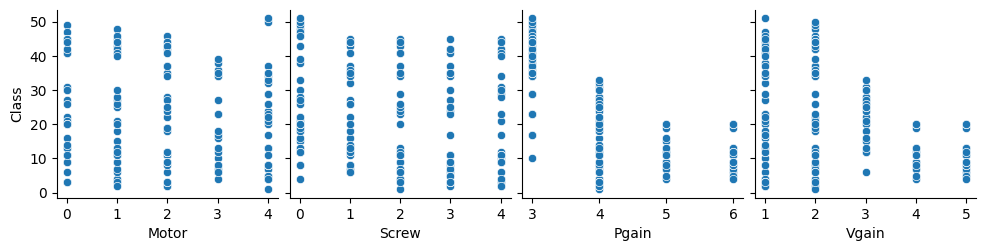

In [ ]:
sns.pairplot(df,x_vars=['Motor', 'Screw', 'Pgain', 'Vgain'],y_vars=['Class'])

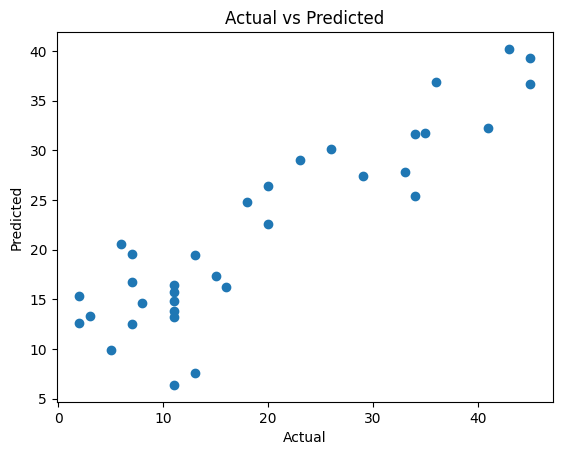

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [ ]:
x_new=df.sample(2)
x_new

,Motor,Screw,Pgain,Vgain,Class
80,4,0,3,1,51
30,1,4,4,2,6


In [ ]:
x_new.shape

(2, 5)

In [ ]:
x_new=x_new.drop('Class',axis=1)

In [ ]:
x_new

,Motor,Screw,Pgain,Vgain
80,4,0,3,1
30,1,4,4,2


In [ ]:
y_pred_new=reg.predict(x_new)

In [ ]:
y_pred_new

array([32.54775423, 16.98201825])